In [1]:
!pip install opencv-python numpy

In [2]:
!pip install opencv-python-headless

In [3]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [4]:
# Define the dimensions of checkerboard
CHECKERBOARD = (5, 8)


# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)


In [5]:
# Listas para almacenar los puntos
threedpoints = []  # puntos 3D en el mundo real
twodpoints = []    # puntos 2D en la imagen

#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None


In [6]:
# Extracting path of individual image stored
# in a given directory. Since no path is
# specified, it will take current directory
# jpg files alone
images = glob.glob('../Imagenes_calibracion/*.jpeg')

print(f"🔍 Se encontraron {len(images)} imágenes.")


🔍 Se encontraron 7 imágenes.


✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen1.jpeg


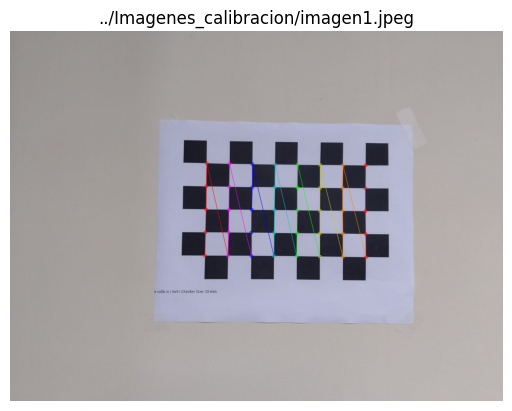

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen2.jpeg


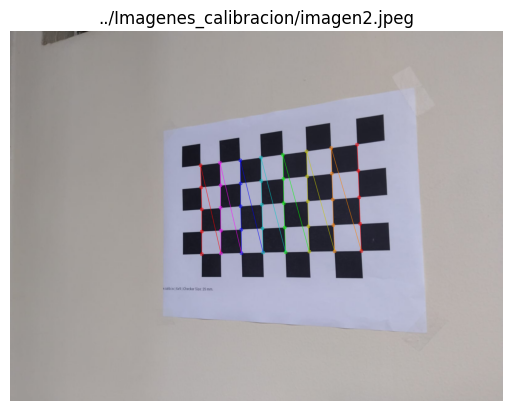

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen3.jpeg


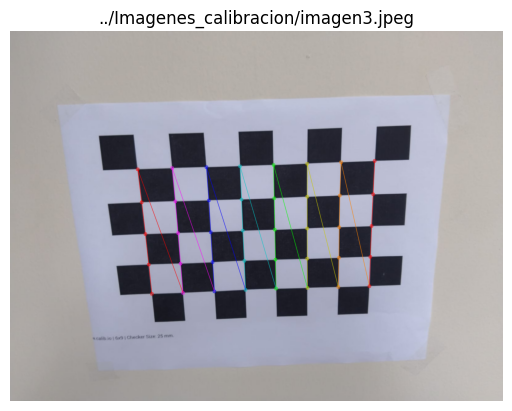

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen4.jpeg


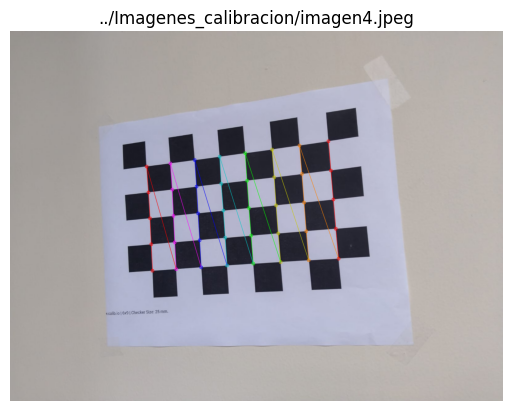

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen5.jpeg


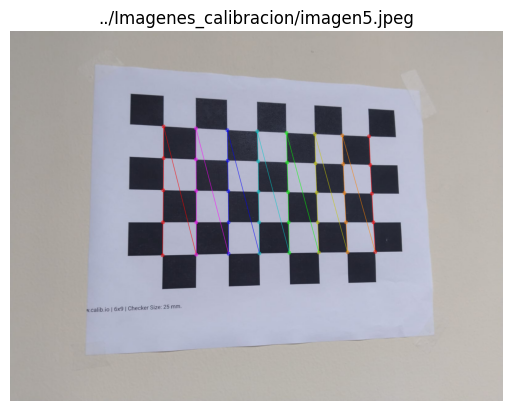

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen6.jpeg


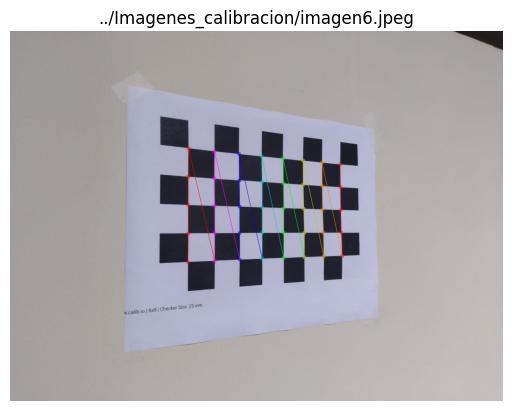

✅ Esquinas detectadas en: ../Imagenes_calibracion/imagen7.jpeg


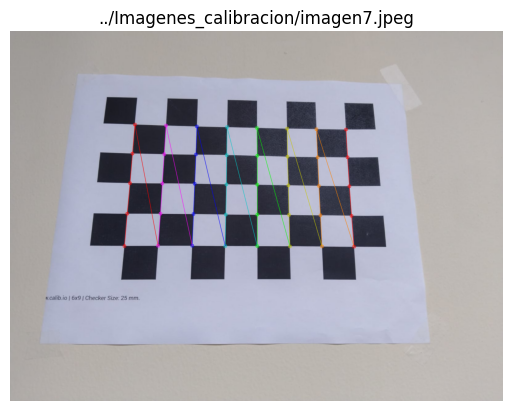

In [7]:
for filename in images:
    image = cv2.imread(filename)

    if image is None:
        print(f"⚠️ No se pudo cargar la imagen: {filename}")
        continue

    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(
        grayColor, CHECKERBOARD,
        cv2.CALIB_CB_ADAPTIVE_THRESH +
        cv2.CALIB_CB_FAST_CHECK +
        cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret:
        print(f"✅ Esquinas detectadas en: {filename}")
        threedpoints.append(objectp3d)

        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)

        twodpoints.append(corners2)

        image = cv2.drawChessboardCorners(image, CHECKERBOARD, corners2, ret)

        # Mostrar imagen en Jupyter
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
        plt.title(filename)
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ No se detectaron esquinas en: {filename}")

In [8]:
# Verifica si hay suficientes imágenes válidas
if len(threedpoints) < 3:
    print("No hay suficientes imágenes válidas para calibrar la cámara.")
else:
    h, w = grayColor.shape[:2]
    ret, camera_matrix, dist_coeffs, r_vecs, t_vecs = cv2.calibrateCamera(
        threedpoints, twodpoints, (w, h), None, None)

    print("\n Matriz de la cámara:")
    print(camera_matrix)

    print("\n Coeficientes de distorsión:")
    print(dist_coeffs)

    print("\n Vectores de rotación:")
    print(r_vecs)

    print("\n📦 Vectores de traslación:")
    print(t_vecs)

    print(f"\n Error RMS global: {ret:.4f}")


 Matriz de la cámara:
[[1.25010571e+03 0.00000000e+00 8.09686073e+02]
 [0.00000000e+00 1.25728857e+03 6.03458032e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Coeficientes de distorsión:
[[ 2.77056202e-01 -2.05867045e+00  6.05438042e-04 -1.13100408e-03
   6.47106200e+00]]

 Vectores de rotación:
(array([[-0.05829459],
       [ 0.01563117],
       [ 1.58111444]]), array([[0.26654845],
       [0.39881851],
       [1.50476995]]), array([[ 0.19843224],
       [-0.21691083],
       [ 1.52713015]]), array([[0.15097798],
       [0.25264464],
       [1.47702542]]), array([[-0.24452866],
       [-0.0740958 ],
       [ 1.55514758]]), array([[-0.43925764],
       [-0.36117714],
       [ 1.53722031]]), array([[-0.25276945],
       [ 0.17160729],
       [ 1.56223833]]))

📦 Vectores de traslación:
(array([[ 4.67364955],
       [-2.26555422],
       [17.19477092]]), array([[ 3.69761391],
       [-2.73722516],
       [14.79844318]]), array([[ 3.41281639],
       [-1.65180998],
       [11.55

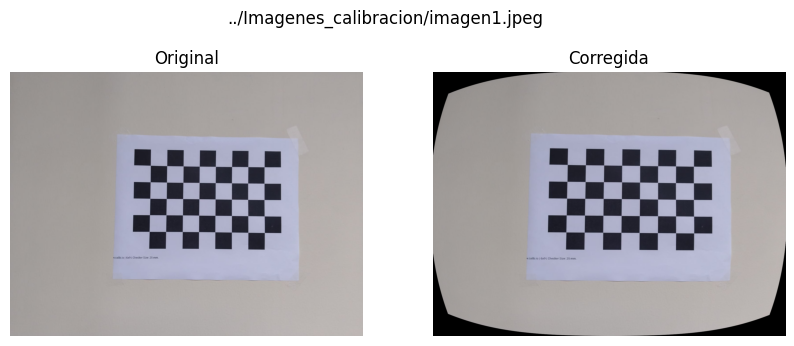

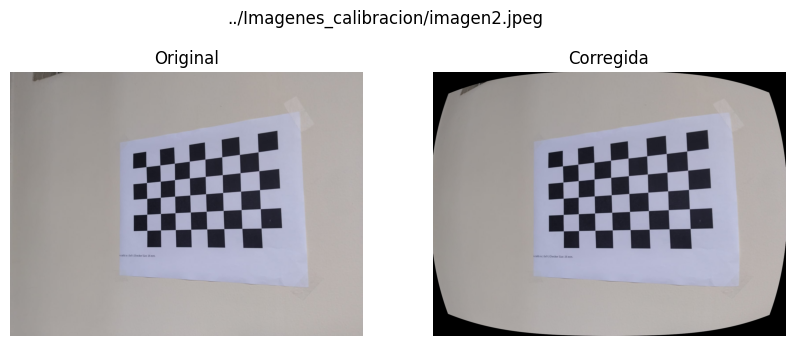

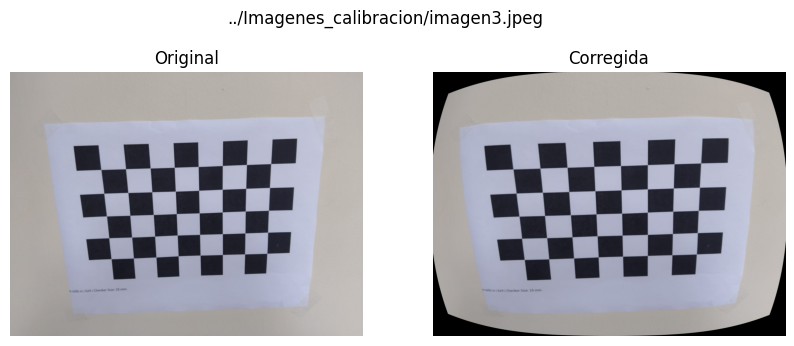

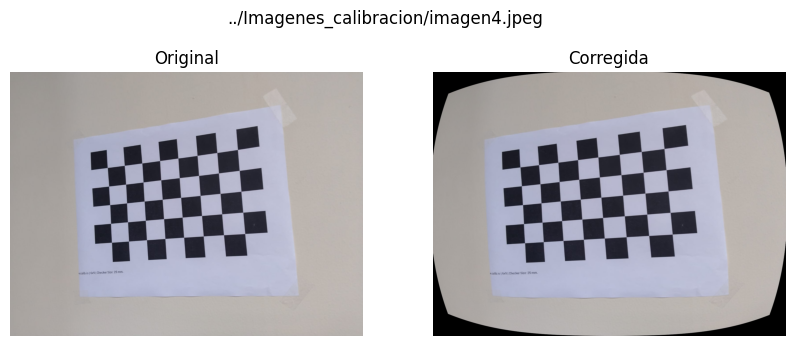

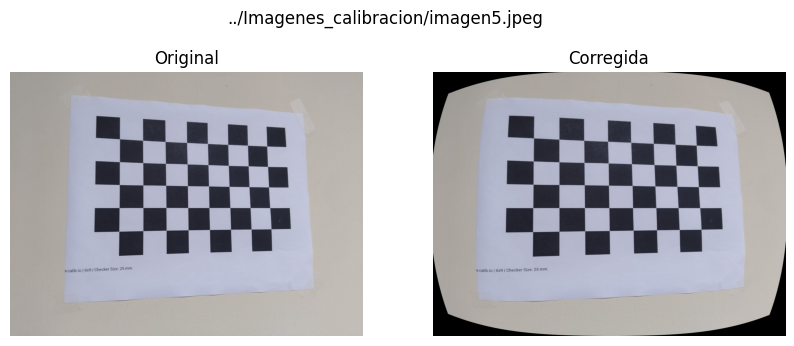

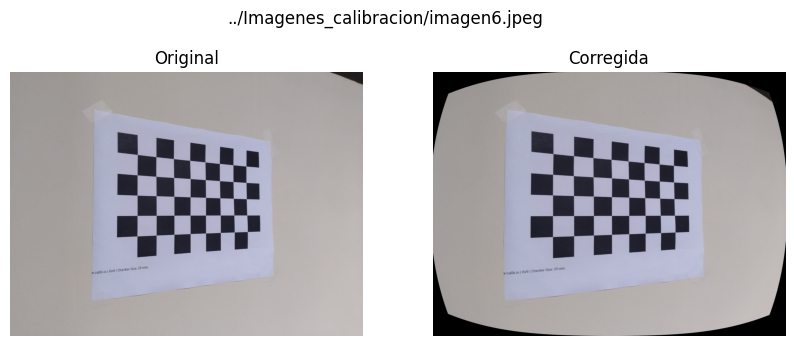

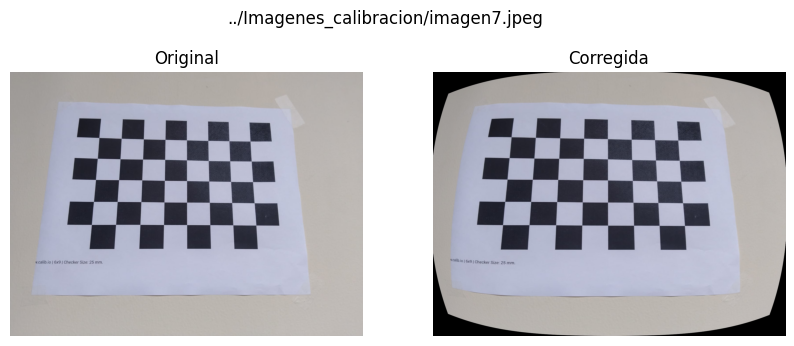

In [9]:
# 📌 Mostrar original vs corregida
for filename in images:
    img = cv2.imread(filename)

    if img is None:
        print(f"⚠️ No se pudo cargar: {filename}")
        continue

    h, w = img.shape[:2]

    # Obtener nueva matriz de cámara sin distorsión
    new_camera_mtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, dist_coeffs, (w, h), 1, (w, h))

    # Corregir la distorsión
    undistorted = cv2.undistort(img, camera_matrix, dist_coeffs, None, new_camera_mtx)

    # Convertir a RGB para mostrar en matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undist_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

    # Mostrar lado a lado
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(undist_rgb)
    plt.title("Corregida")
    plt.axis("off")

    plt.suptitle(filename)
    plt.show()

In [10]:

# 📌 Cargar una imagen de calibración
img = cv2.imread('../Imagenes_calibracion/imagen.jpeg')  # ajusta la ruta si es necesario

if img is None:
    print("⚠️ No se pudo cargar la imagen.")
else:
    h, w = img.shape[:2]

    # Extraer parámetros
    fx = camera_matrix[0, 0]
    fy = camera_matrix[1, 1]
    cx = camera_matrix[0, 2]
    cy = camera_matrix[1, 2]

    # 📊 Comparar focales
    print(f"Longitud focal fx: {fx:.2f}")
    print(f"Longitud focal fy: {fy:.2f}")
    print("¿fx ≈ fy?", "✅ Sí" if abs(fx - fy) < 10 else "⚠️ No")

    # 📊 Comparar punto principal con centro de imagen
    center_x = w / 2
    center_y = h / 2
    print(f"\nCentro de imagen: ({center_x:.1f}, {center_y:.1f})")
    print(f"Punto principal (cx, cy): ({cx:.1f}, {cy:.1f})")
    print("¿Está cerca del centro?", "✅ Sí" if abs(cx - center_x) < 20 and abs(cy - center_y) < 20 else "⚠️ No")

    # 🖼️ Mostrar imagen con marcas
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.scatter([center_x], [center_y], color='blue', label='Centro imagen')
    plt.scatter([cx], [cy], color='red', label='Punto principal (cx, cy)')
    plt.legend()
    plt.title("Comparación de centro vs punto principal")
    plt.axis("off")
    plt.show()




⚠️ No se pudo cargar la imagen.


[ WARN:0@25.391] global loadsave.cpp:275 findDecoder imread_('../Imagenes_calibracion/imagen (1).jpeg'): can't open/read file: check file path/integrity
